In [1]:
from fastai.text.all import *

In [7]:
path = Path('/storage/Corona_NLP_train.csv')

In [10]:
import pandas as pd
df = pd.read_csv(path, usecols = ['OriginalTweet', 'Sentiment'], encoding = 'latin1')
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [ ]:
dls_lm = TextDataLoaders.from_df(df, 
                                 text_col = 'OriginalTweet', 
                                 label_col = 'Sentiment', 
                                 valid_pct = 0.20, 
                                 bs = 64, 
                                 is_lm = True)

In [12]:
dls_lm.show_batch(max_n = 1)

,text,text_
0,"xxbos xxmaj will be putting xxunk in the consumer packaged goods industry during xxup covid-19 xxunk on my resume after all of this is done . xxmaj if you know the amount of work that is put into getting food in a store , then you understand what xxmaj iâm talking about ? xxbos xxmaj president and xxup ceo xxmaj xxunk xxmaj xxunk was on xxup cnbc s xxmaj mad xxmaj money","xxmaj will be putting xxunk in the consumer packaged goods industry during xxup covid-19 xxunk on my resume after all of this is done . xxmaj if you know the amount of work that is put into getting food in a store , then you understand what xxmaj iâm talking about ? xxbos xxmaj president and xxup ceo xxmaj xxunk xxmaj xxunk was on xxup cnbc s xxmaj mad xxmaj money with"


SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.033113110810518265)

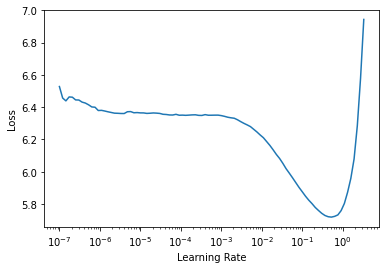

In [14]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult = 0.3)
learn.lr_find()

In [15]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time
0,4.084689,3.855807,03:04


In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-2)

epoch,train_loss,valid_loss,time
0,3.780102,3.711546,03:41
1,3.834569,3.796412,03:41
2,3.795526,3.776477,03:49
3,3.682273,3.731559,03:43
4,3.538272,3.681702,03:41
5,3.379796,3.631807,03:41
6,3.134717,3.606925,03:41
7,2.880772,3.619262,03:42
8,2.613088,3.657071,03:41
9,2.485709,3.688875,03:41


In [18]:
learn.save_encoder('finetuned')

In [19]:
dls_clas = TextDataLoaders.from_df(df, 
                        valid_pct = 0.2, 
                        text_col = 'OriginalTweet',
                        label_col = 'Sentiment', 
                        bs = 64, 
                        text_vocab = dls_lm.vocab)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [20]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult = 0.5, metrics = accuracy).to_fp16()
learn = learn.load_encoder('finetuned')

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=7.585775847473997e-07)

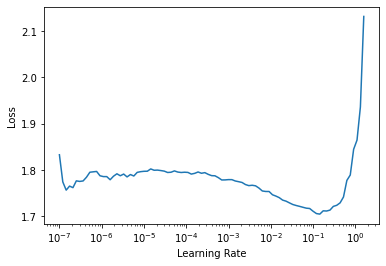

In [21]:
learn.lr_find()

In [22]:
learn.fit_one_cycle(1, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.518202,1.369227,0.411372,01:01


In [23]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.361252,1.250182,0.459604,01:12


In [24]:
learn.freeze_to(-4)
learn.fit_one_cycle(1, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.059286,0.945702,0.624590,02:24


In [25]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.903894,0.768290,0.700644,02:28
1,0.760525,0.660236,0.744502,02:28
2,0.612498,0.571476,0.793828,02:28
3,0.523483,0.491072,0.825173,02:28
4,0.451265,0.475259,0.831977,02:29


In [27]:
learn.predict('This was a really bad day in my life. My whole family except my dad was infected.')

('Extremely Negative',
 tensor(0),
 tensor([9.7521e-01, 1.8054e-02, 5.1762e-05, 5.3735e-03, 1.3143e-03]))